# ME-793 Assignment 4

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('Periodic-table-final.csv')
data.head()

,Symbol,Atomic Number,Electronegativity,Atomic Radii (pm),Thermal Conductivity,Density,Crystal System
0,H,1,2.20,53.0,0.1805,0.000090,Simple Hexagonal
1,He,2,NaN,31.0,0.1513,0.000179,Face Centered Cubic
2,Li,3,0.98,167.0,85.0000,0.534000,Body Centered Cubic
3,Be,4,1.57,112.0,190.0000,1.850000,Simple Hexagonal
4,B,5,2.04,87.0,27.0000,2.340000,Simple Trigonal


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                118 non-null    object 
 1   Atomic Number         118 non-null    int64  
 2   Electronegativity     96 non-null     float64
 3   Atomic Radii (pm)     86 non-null     float64
 4   Thermal Conductivity  94 non-null     float64
 5   Density               105 non-null    float64
 6   Crystal System        113 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.6+ KB


# Linear Regression

Develop a Linear Regression based model where electronegativity is X and thermal conductivity is Y.

In [42]:
data = data.dropna(subset=['Electronegativity', 'Thermal Conductivity'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 96
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                88 non-null     object 
 1   Atomic Number         88 non-null     int64  
 2   Electronegativity     88 non-null     float64
 3   Atomic Radii (pm)     79 non-null     float64
 4   Thermal Conductivity  88 non-null     float64
 5   Density               88 non-null     float64
 6   Crystal System        88 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ KB


In [43]:
x = data['Electronegativity'].to_numpy().reshape((-1,1))
y = data['Thermal Conductivity'].to_numpy().reshape((-1,1))
model = LinearRegression().fit(x, y)

In [44]:
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.0034400371551558395


In [45]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [48.82571072]
slope: [[7.6155365]]


In [46]:
y_pred = model.intercept_ + model.coef_ * x

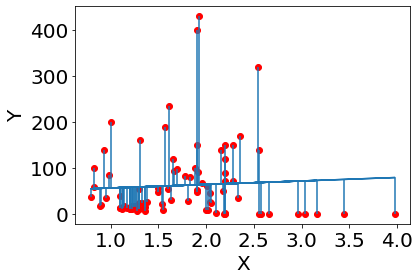

In [47]:
plt.plot(x,y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x,y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.scatter(x,y+dy)
plt.vlines(x,y,y_pred)
plt.show()

It can be seen that Y: 'Thermal Conductivity' is not a straight linear function of X: 'Electronegativity' and so the linear relation obtained has high errors associated with it. Also, there are a few extreme outliers to this model; the ones with the Y values >300 and they are contributing substantially to the high error and low R-sq value obtained.

# Multilinear Regression

Develop a MultiLinear Regression based model where electronegativity is X1 and density is X2 and thermal conductivity is Y.

In [83]:
x = np.array([data['Electronegativity'], data['Density']]).reshape((-1,2))
y = np.array(data['Thermal Conductivity']).reshape((-1,1))

In [84]:
model = LinearRegression().fit(x, y)

In [85]:
r_sq = model.score(x, y)
print('Coefficient of determination: ', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Coefficient of determination:  0.06650690347807742
intercept: [81.09966086]
slope: [[ 2.46910768 -6.27902953]]


In [86]:
y_pred = model.predict(x)

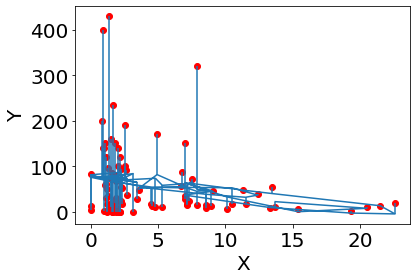

In [87]:
# Electronegativity
plt.plot(x[:,0],y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x[:,0],y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(x[:,0],y,y_pred)
plt.show()

The graph for 'Electronegativity' v/s 'Thermal Conductivity' can be seen as very different than that obtained from the linear regression. This multinomial regression allows for extra information obtained from the second variable 'Density' and hence is leading to an improved R-square value too.

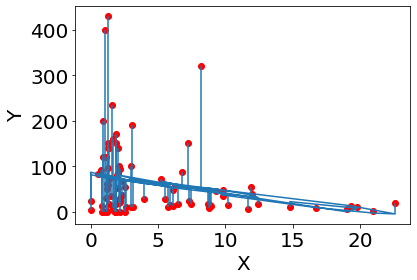

In [88]:
# Density
plt.plot(x[:,1],y_pred)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.scatter(x[:,1],y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(x[:,1],y,y_pred)
plt.show()

# Gradient Descent

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
reg = make_pipeline(StandardScaler(), SGDRegressor())
reg.fit(x,y)

/home/saumya/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [66]:
y_pred = reg.predict(x)

In [67]:
r_sq = reg.score(x, y)
print('Coefficient of determination: ', r_sq)

Coefficient of determination:  0.06445754026008121


## Using the Gradient Descent function from the tutorial

In [70]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [74]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [98]:
lr =0.01
n_iter = 1000

theta = np.random.randn(3,1)

X_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Intercept:          {:0.3f},\nSlope for EN values:          {:0.3f},\nSlope for Density values:         {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Intercept:          80.659,
Slope for EN values:          2.532,
Slope for Density values:         -6.298
Final cost/MSE:  23911975.750


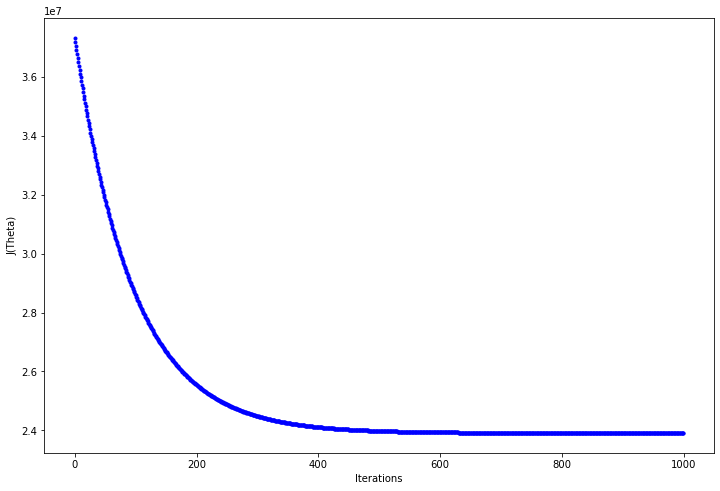

In [99]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

It can be seen that after around 500 iterations, the loss is converged and no further optimisation occurs after that. 